In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data_path = "..\iris_clusters\Iris.csv"
data = pd.read_csv(data_path)

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.drop("Id", axis=1, inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
X = data.drop("Species", axis=1)
y = data["Species"]

## K-Means Clustering Algorithm

K-means clustering is an unsupervised learning algorithm which is used to find groups in the data.
The algorithm alternates between two steps: assigning each data point to the closest cluster center, and then setting each cluster center as the mean of the data points that are assigned to it.

In [7]:
from sklearn.cluster import KMeans

## Checking the number of clusters

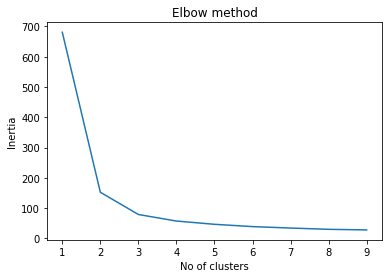

In [8]:
K_clusters = range(1,10)
SSE = [] # list to hold sum of squared distances
for clusters in K_clusters:
    kmeans = KMeans(n_clusters=clusters).fit(X)
    SSE.append(kmeans.inertia_)
plt.plot(K_clusters, SSE)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Inertia')
plt.show()


Inertia calculates the sum of distances of all the points within a cluster from the centroid of that cluster. The distance between them should be as low as possible.

Here our optimal cluster value is 3.

In [9]:
kmeans3 = KMeans(n_clusters = 3)
y_pred = kmeans3.fit_predict(X)

## Visualize the data

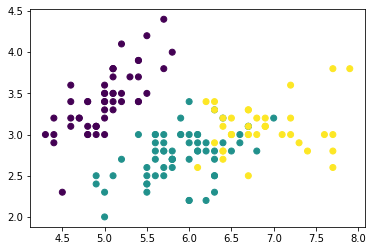

In [10]:
plt.scatter(X.iloc[:,0],X.iloc[:,1], c = y_pred)